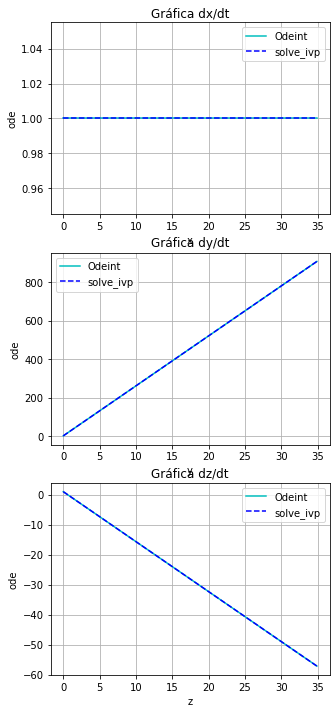

In [2]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

a = 10
b = 28
c = 8/3

xini=1.0
yini=1.0
zini=1.0
h=0.1
x0=0

t_span=[x0, 35]
puntos = np.arange(x0, 35, h)
y = np.array([xini, yini, zini])

def fun(x0, y0):
    dxdy = np.zeros(3)
    dxdy[0] = a*(y[1]-y[0])
    dxdy[1] = y[0]*(b-y[2]) - y[1]
    dxdy[2] = y[0]*y[1] - c*y[2]
    return dxdy
    
sol_ivp = solve_ivp(fun, t_span, y, t_eval=puntos )
sol_ode = odeint(fun, y, puntos)

#Gráfica dx/dt
fig, a = plt.subplots(3,1, figsize=(5,12))

a[0].plot(puntos, sol_ode[:, 0],'c', label='Odeint')
a[0].plot(puntos, sol_ivp.y[0],'--b',label='solve_ivp')
a[0].set_xlabel('x')
a[0].set_ylabel('ode')
a[0].set_title('Gráfica dx/dt')
a[0].legend()
a[0].grid()

#Gráfica dy/dt
a[1].plot(puntos, sol_ode[:, 1],'c', label='Odeint')
a[1].plot(puntos, sol_ivp.y[1],'--b',label='solve_ivp')
a[1].set_xlabel('y')
a[1].set_ylabel('ode')
a[1].set_title('Gráfica dy/dt')
a[1].legend()
a[1].grid()

#Gráfica dz/dt
a[2].plot(puntos, sol_ode[:, 2],'c', label='Odeint')
a[2].plot(puntos, sol_ivp.y[2],'--b',label='solve_ivp')
a[2].set_xlabel('z')
a[2].set_ylabel('ode')
a[2].set_title('Gráfica dz/dt')
a[2].legend()
a[2].grid()


#Las gráficas no son como en clase, yo creo que es porque Scipy toma los elementos de cada vector que da la función 
#como elementos independientes y simplemente los resuelve por separado, pero no estoy muy segura.